<a href="https://colab.research.google.com/github/bajajharsha/deep-learning-resources/blob/main/3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Gradient Descent For Neural Network (or Logistic Regression)
##Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [6]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

**Model Building:** First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

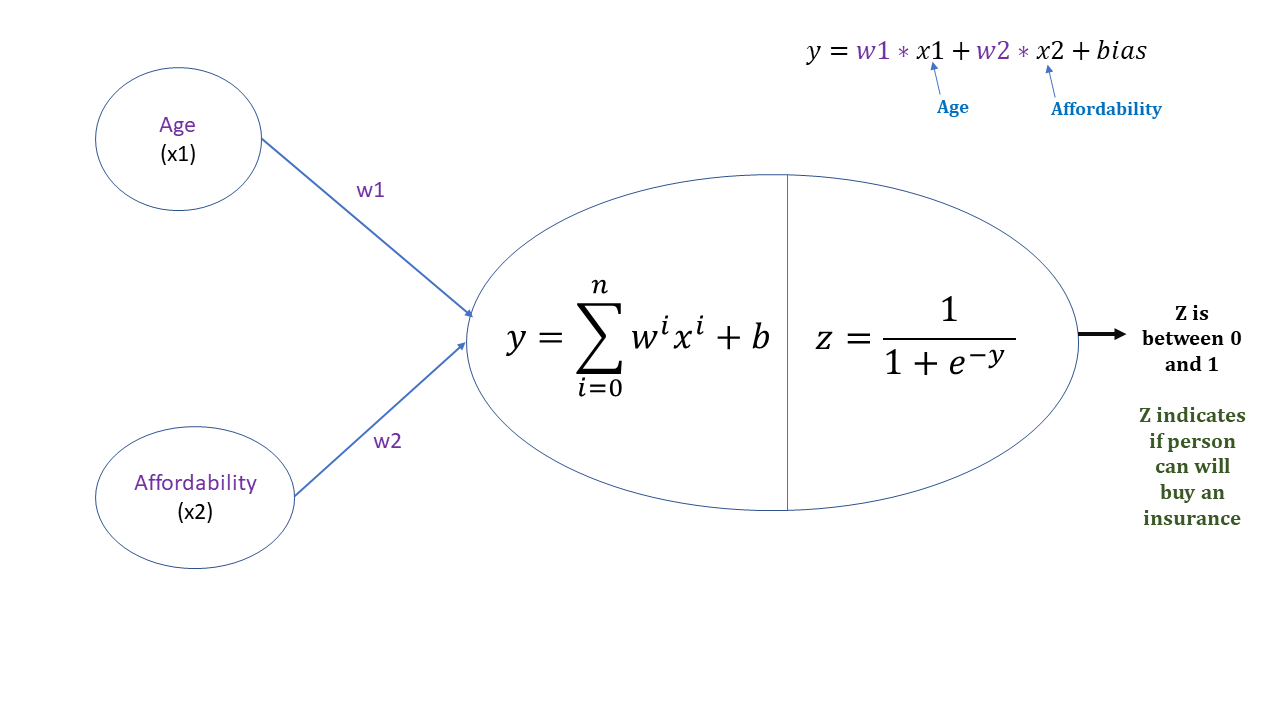

In [7]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.7098


In [8]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5000 - loss: 0.7305


[0.730549156665802, 0.5]

In [9]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.8111734 ],
       [0.7629826 ],
       [0.5630873 ],
       [0.78050345],
       [0.8142026 ],
       [0.8315921 ]], dtype=float32)

In [10]:
y_test

,bought_insurance
2,1
10,0
21,0
11,0
14,1
9,1


In [12]:
w, b = model.get_weights()
w,b

(array([[0.99500155],
        [0.9950011 ]], dtype=float32),
 array([-0.00499922], dtype=float32))